In [161]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import joblib
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Reading the Data

In [163]:
df=pd.read_excel(r'DATA.xlsx')
Features = df.columns[0:8]  
target = df.columns[8]  

In [27]:
target

'PHE'

In [164]:
X = df[Features]
y = df[target]

In [29]:
y

0      83.80
1      79.90
2      89.60
3      99.99
4      82.60
       ...  
145    92.07
146    72.60
147    61.87
148    42.24
149    75.03
Name: PHE, Length: 150, dtype: float64

# Split the data

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state =2) 

# Correlation Matrix 

<AxesSubplot:>

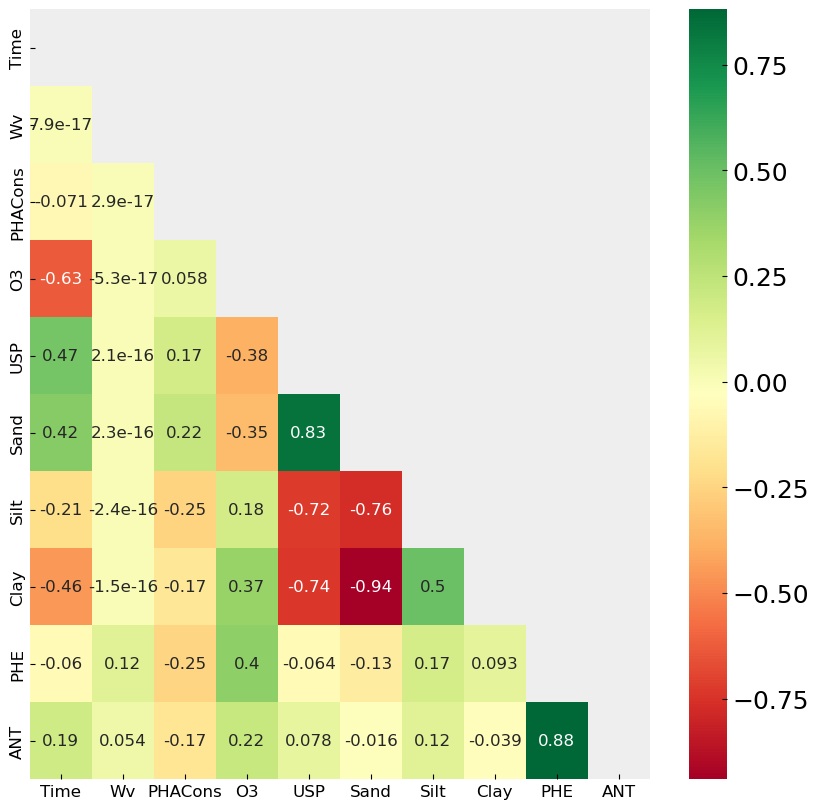

In [166]:
import seaborn as sns
c_matrix=df.copy()
mask=np.zeros_like(c_matrix.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

corrmat = c_matrix.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plot heat map
sns.heatmap(c_matrix[top_corr_features].corr(),mask=mask, annot=True,annot_kws={'size':12}, cmap="RdYlGn")

# MultiLeanear Regression

In [167]:
from sklearn import linear_model
ML_REG = linear_model.LinearRegression()

In [168]:
for rs in [35,39,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90]:
    print('rs = ', rs)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state =rs) 

    Xtrain=np.asanyarray(X_train[['Time', 'Wv', 'PHACons', 'O3', 'USP', 'Sand', 'Silt', 'Clay']])
    ytrain=np.asanyarray(y_train)

    Xtest=np.asanyarray(X_test[['Time', 'Wv', 'PHACons', 'O3', 'USP', 'Sand', 'Silt', 'Clay']])
    ytest=np.asanyarray(y_test)
    
    MLR=ML_REG.fit(Xtrain, ytrain)
    ypred_train=MLR.predict(Xtrain)
    r2_train = r2_score(ytrain, ypred_train)
    print('R2_train = ', r2_train)
    joblib.dump(MLR, 'MLR.sav')
    ypred_test=MLR.predict(Xtest)
    r2_test = r2_score(ytest, ypred_test)
    print('R2_test = ', r2_test)
    print('----------------------------------------------------')
    
    

rs =  35
R2_train =  0.3654838060433677
R2_test =  0.12025125814064064
----------------------------------------------------
rs =  39
R2_train =  0.3187801967785484
R2_test =  0.6205371584933385
----------------------------------------------------
rs =  73
R2_train =  0.34398545479488574
R2_test =  0.3491592079068747
----------------------------------------------------
rs =  74
R2_train =  0.3571493219607349
R2_test =  0.22392191634330894
----------------------------------------------------
rs =  75
R2_train =  0.36667325148973273
R2_test =  0.24193076078184772
----------------------------------------------------
rs =  76
R2_train =  0.3431359630373463
R2_test =  0.42361367555309104
----------------------------------------------------
rs =  77
R2_train =  0.37510917686043455
R2_test =  0.17215999105603685
----------------------------------------------------
rs =  78
R2_train =  0.31293687840101037
R2_test =  0.5571586322993922
----------------------------------------------------
rs =  7

# Gradient Boosting Regression

In [169]:
from sklearn.ensemble import GradientBoostingRegressor as GB

In [170]:
for rs in [35]:           #[35,39,75]
    print(rs)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state =rs) 
    CrossValidationNum=5

    X_train.to_csv('X_train_GBR.csv', index=False)
    X_test.to_csv('X_test_GBR.csv', index=False)

    y_train.to_csv('y_train_GBR.csv', index=False)
    y_test.to_csv('y_test_GBR.csv', index=False)


    param_grid = {'loss' :['squared_error'],
                        'learning_rate' : [0.15],
                        'n_estimators' :[224],
                        'subsample' : [1.0],
                        'criterion' : ['friedman_mse'],
                        'min_samples_split' : [2,3],
                        'min_samples_leaf' : [3],
                        'min_weight_fraction_leaf' : [0],
                        'max_depth' : [4,5,10],
                        'min_impurity_decrease': [0],
                        'max_features': [1],
                        'verbose' : [0],
                        'random_state':[10],
                        'max_leaf_nodes' : [5,6,7],
                        'tol': [0],
                        'ccp_alpha' : [0]}
       
    gs = GridSearchCV( GB(), 
                  param_grid = param_grid, 
                  scoring = 'r2', 
                  n_jobs = -1,
                  cv = CrossValidationNum,
                  verbose = 1, 
                  refit = True)
    gs= gs.fit(X_train, y_train)

    estimator = GB(
                    loss = gs.best_params_['loss'],
                    learning_rate = gs.best_params_['learning_rate'],
                    n_estimators = gs.best_params_['n_estimators'],
                    subsample = gs.best_params_['subsample'],
                    criterion = gs.best_params_['criterion'],
                    min_samples_split = gs.best_params_['min_samples_split'],
                    min_samples_leaf = gs.best_params_['min_samples_leaf'],
                    min_weight_fraction_leaf = gs.best_params_['min_weight_fraction_leaf'],
                    max_depth = gs.best_params_['max_depth'],
                    min_impurity_decrease = gs.best_params_['min_impurity_decrease'],
                    max_features = gs.best_params_['max_features'],
                    verbose = gs.best_params_['verbose'],
                    max_leaf_nodes = gs.best_params_['max_leaf_nodes'],
                    tol = gs.best_params_['tol'],
                    random_state=gs.best_params_['random_state'],
                    ccp_alpha = gs.best_params_['ccp_alpha'])
    
    estimator.fit(X_train, y_train)

    CV5_r2 = cross_val_score(estimator,  X_train, y_train, cv = CrossValidationNum, scoring ='r2').mean()

    ypred_train = estimator.predict(X_train)
    r2_train = r2_score(y_train, ypred_train)
    mse_train = mean_squared_error(y_train, ypred_train)
    
    ypred_test = estimator.predict(X_test)
    r2_test = r2_score(y_test, ypred_test)
    mse_test = mean_squared_error(y_test, ypred_test)
    joblib.dump(estimator, 'GBR.sav')

    print('Complete')
    print(estimator)
    print('R2_Train',r2_train.round(3))
    print('R2_Test',r2_test.round(3))
    print('CV5_R2_Train',CV5_r2 .round(3))
    print('------------------------------------')

35
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Complete
GradientBoostingRegressor(ccp_alpha=0, learning_rate=0.15, max_depth=4,
                          max_features=1, max_leaf_nodes=5,
                          min_impurity_decrease=0, min_samples_leaf=3,
                          min_weight_fraction_leaf=0, n_estimators=224,
                          random_state=10, tol=0)
R2_Train 0.974
R2_Test 0.833
CV5_R2_Train 0.812
------------------------------------


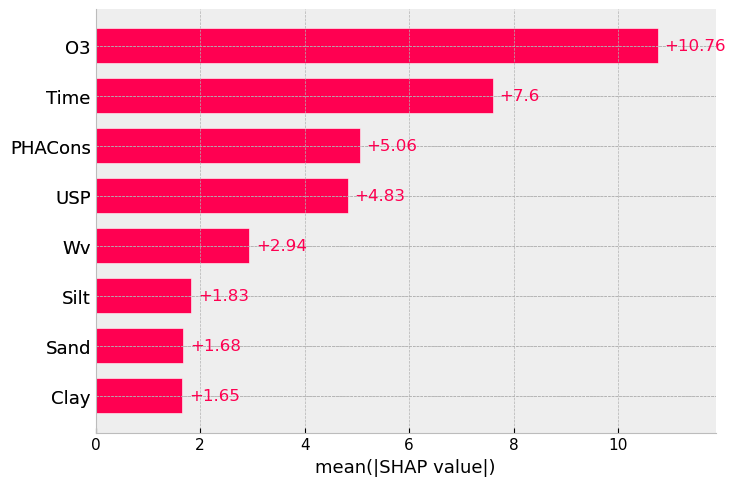

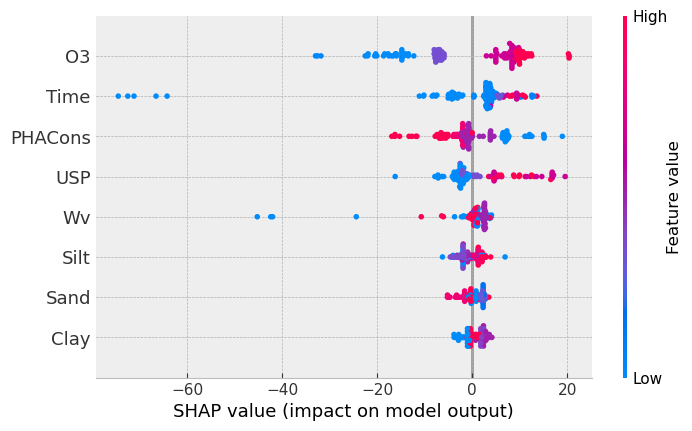

In [171]:
import shap
estimator_GBR = joblib.load('GBR.sav')
explainer = shap.Explainer(estimator_GBR, seed = 1, algorithm ='tree')

shap_values = explainer(X_train) 
ax=shap.plots.bar(shap_values, max_display=12, order=shap.Explanation.abs, show=True)
ax1=shap.plots.beeswarm(shap_values, max_display=10)

# Random Forest

In [172]:
from sklearn.ensemble import RandomForestRegressor as RF

In [173]:
for rs in [37]:
    print('rs= ', rs)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state =rs) 
    CrossValidationNum=10
    X_train.to_csv('X_train_RFR.csv', index=False)
    X_test.to_csv('X_test_RFR.csv', index=False)
    y_train.to_csv('y_train_RFR.csv', index=False)
    y_test.to_csv('y_test_RFR.csv', index=False)    
    
    param_grid = {  'n_estimators' :[190,200,210],
                        'criterion' : ['squared_error'],
                        'min_samples_split' : [2,3],
                        'min_samples_leaf' : [2,3],
                        'min_weight_fraction_leaf' : [0.0],
                        'max_features' :[1],
                        'max_leaf_nodes' : [19,20,21],
                        'min_impurity_decrease' :[ 0.0],
                        'n_jobs' : [-1],
                        'random_state' : [10],
                        'ccp_alpha' :[ 0.05,0]}
    
    gs = GridSearchCV( RF(), 
                      param_grid = param_grid, 
                      scoring = 'r2', 
                      n_jobs = -1,
                      cv = CrossValidationNum,
                      verbose = 1, 
                      refit = True)
    gs = gs.fit(X_train, y_train)
    
    estimator = RF( n_estimators=gs.best_params_['n_estimators'],
                        criterion=gs.best_params_['criterion'],
                        min_samples_split=gs.best_params_['min_samples_split'],
                        min_samples_leaf=gs.best_params_['min_samples_leaf'],
                        min_weight_fraction_leaf=gs.best_params_['min_weight_fraction_leaf'],
                        max_features=gs.best_params_['max_features'],
                        max_leaf_nodes=gs.best_params_['max_leaf_nodes'],
                        min_impurity_decrease=gs.best_params_['min_impurity_decrease'],
                        random_state=gs.best_params_['random_state'],
                        n_jobs=gs.best_params_['n_jobs'],
                        ccp_alpha=gs.best_params_['ccp_alpha'])
    
    estimator.fit(X_train, y_train)
    joblib.dump(estimator, 'RFR.sav')
    CV5_r2 = cross_val_score(estimator,  X_train, y_train, cv = CrossValidationNum, scoring ='r2').mean()

    
    y_fpred_train = estimator.predict(X_train)
    f_r2_train = r2_score(y_train, y_fpred_train)
    f_mse_train = mean_squared_error(y_train, y_fpred_train)
    
    y_fpred_test = estimator.predict(X_test)
    f_r2_test = r2_score(y_test, y_fpred_test)
    f_mse_test = mean_squared_error(y_test, y_fpred_test)
    

    print('R2_Train',f_r2_train.round(3))
    print('R2_Test',f_r2_test.round(3))
    print('CV5_R2_Train',CV5_r2 .round(3))
    print('--------------------------------------')

rs=  37
Fitting 10 folds for each of 72 candidates, totalling 720 fits
R2_Train 0.608
R2_Test 0.397
CV5_R2_Train 0.329
--------------------------------------


In [174]:
estimator

RandomForestRegressor(ccp_alpha=0, max_features=1, max_leaf_nodes=21,
                      min_samples_leaf=2, n_estimators=190, n_jobs=-1,
                      random_state=10)

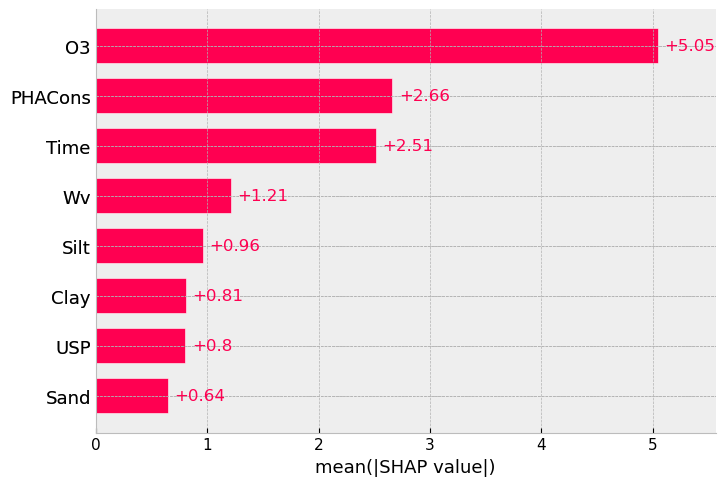

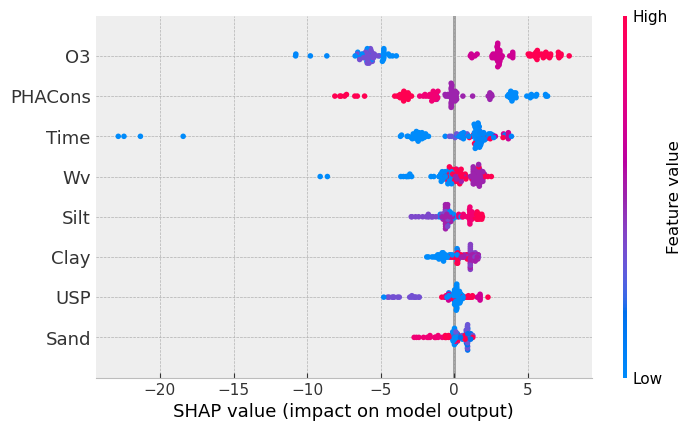

In [175]:
import shap
estimator_RFR = joblib.load('RFR.sav')
explainer = shap.Explainer(estimator_RFR, seed = 1, algorithm ='tree')

shap_values = explainer(X_train) 
ax=shap.plots.bar(shap_values, max_display=12, order=shap.Explanation.abs, show=True)
ax1=shap.plots.beeswarm(shap_values, max_display=10)

# Xtream Gradient Boosting

In [176]:
from xgboost import XGBRegressor as XGBR

In [177]:
for rs in [5]:      #[79,83,2]
    print('rs= ', rs)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state =rs) 
    CrossValidationNum=10
    X_train.to_csv('X_train_XGBR.csv', index=False)
    X_test.to_csv('X_test_XGBR.csv', index=False)
    y_train.to_csv('y_train_XGBR.csv', index=False)
    y_test.to_csv('y_test_XGBR.csv', index=False)   
    
    
    param_grid = {'learning_rate' : [0.045],
                  'n_estimators' :[180],
                  'max_depth' :[6],
                  'n_jobs'  : [-1],
                  'reg_alpha' :[0.18],
                  'reg_lambda' : [0.045],
                  'predictor' : ['cpu_predictor']}
    gs = GridSearchCV(XGBR(), 
                      param_grid = param_grid, 
                      scoring = 'r2', 
                      n_jobs = -1,
                      cv = CrossValidationNum,
                      verbose = 1, 
                      refit = True)
    gs = gs.fit(X_train, y_train)
                  
    estimator =XGBR(    learning_rate=gs.best_params_['learning_rate'],
                        n_estimators=gs.best_params_['n_estimators'],
                        max_depth=gs.best_params_['max_depth'],
                        n_jobs=gs.best_params_['n_jobs'],
                        reg_alpha=gs.best_params_['reg_alpha'],
                        reg_lambda=gs.best_params_['reg_lambda'],
                        predictor=gs.best_params_['predictor'])
    
    estimator.fit(X_train, y_train)
    joblib.dump(estimator, 'XGBR.sav')
    CV5_r2 = cross_val_score(estimator,  X_train, y_train, cv = CrossValidationNum, scoring ='r2').mean()
    y_fpred_train = estimator.predict(X_train)
    f_r2_train = r2_score(y_train, y_fpred_train)
    f_mse_train = mean_squared_error(y_train, y_fpred_train)
    
    y_fpred_test = estimator.predict(X_test)
    f_r2_test = r2_score(y_test, y_fpred_test)
    f_mse_test = mean_squared_error(y_test, y_fpred_test)
    
    print(estimator)
    print('R2_Train',f_r2_train.round(3))
    print('R2_Test',f_r2_test.round(3))
    print('CV5_R2_Train',CV5_r2 .round(3))
    
    
    print('--------------------------------------')                 
    

rs=  5
Fitting 10 folds for each of 1 candidates, totalling 10 fits
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.045, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=180, n_jobs=-1,
             num_parallel_tree=1, predictor='cpu_predictor', random_state=0,
             reg_alpha=0.18, reg_lambda=0.045, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
R2_Train 0.999
R2_Test 0.895
CV5_R2_Train 0.858
--------------------------------------


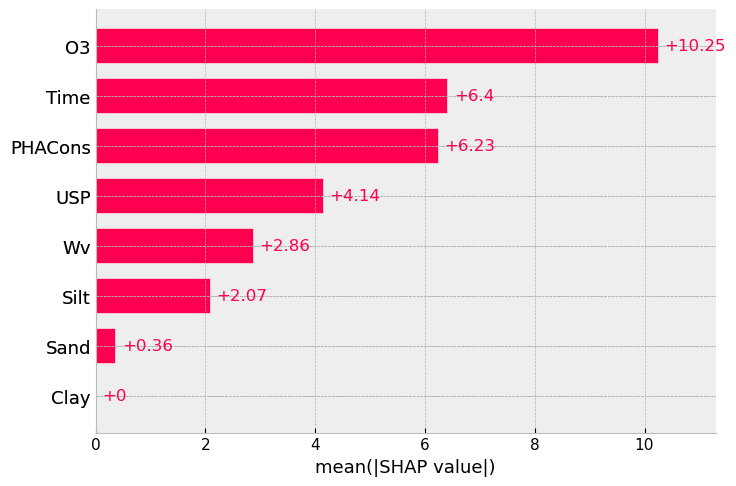

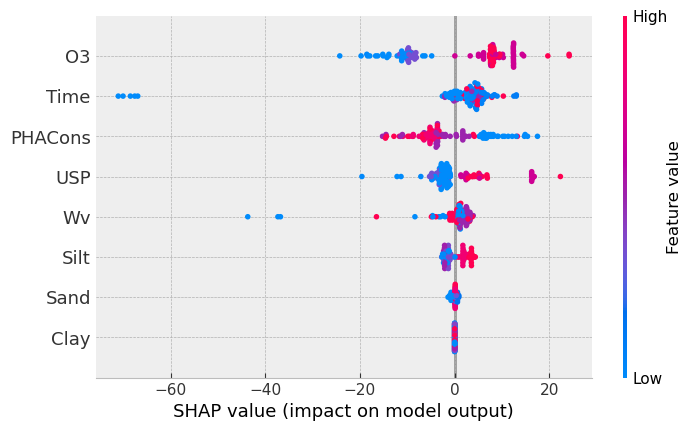

In [178]:
import shap
estimator_XGBR = joblib.load('XGBR.sav')
explainer = shap.Explainer(estimator_XGBR, seed = 1, algorithm ='tree')

shap_values = explainer(X_train) 
ax=shap.plots.bar(shap_values, max_display=12, order=shap.Explanation.abs, show=True)
ax1=shap.plots.beeswarm(shap_values, max_display=10)

In [186]:
estimator_MLR = joblib.load('MLR.sav')
estimator_GBR = joblib.load('GBR.sav')
estimator_RFR = joblib.load('RFR.sav')
estimator_XGBR = joblib.load('XGBR.sav')

In [180]:
df

Time   Wv  PHACons    O3  USP   Sand   Silt   Clay    PHE    ANT
0       4  200    262.5  2.80    0  13.79  66.44  19.77  83.80  60.30
1       4  400    262.5  2.80    0  13.79  66.44  19.77  79.90  45.50
2       6  300    135.0  4.15    0  13.79  66.44  19.77  89.60  49.10
3       4  200      7.5  2.80    0  13.79  66.44  19.77  99.99  99.99
4       4  200    262.5  2.80    0  13.79  66.44  19.77  82.60  59.80
..    ...  ...      ...   ...  ...    ...    ...    ...    ...    ...
145     4  200    350.0  5.50  195  42.93  51.43   5.63  92.07  70.43
146     2  100    350.0  4.15  290  42.93  51.43   5.63  72.60  50.76
147     6  300    350.0  1.45  290  42.93  51.43   5.63  61.87  39.49
148     2  100    350.0  1.45  100  42.93  51.43   5.63  42.24  20.82
149     4  200    350.0  2.80  195  42.93  51.43   5.63  75.03  53.61

[150 rows x 10 columns]

In [187]:
df['MLR']=estimator_MLR.predict(df[Features]).round(2)
df['RFR']=estimator_RFR.predict(df[Features]).round(2)
df['GBR']=estimator_GBR.predict(df[Features]).round(2)
df['XGBR']=estimator_XGBR.predict(df[Features]).round(2)
df.head(50)

Time   Wv  PHACons    O3  USP   Sand   Silt   Clay    PHE    ANT    MLR  \
0      4  200    262.5  2.80    0  13.79  66.44  19.77  83.80  60.30  72.01   
1      4  400    262.5  2.80    0  13.79  66.44  19.77  79.90  45.50  77.27   
2      6  300    135.0  4.15    0  13.79  66.44  19.77  89.60  49.10  94.63   
3      4  200      7.5  2.80    0  13.79  66.44  19.77  99.99  99.99  86.65   
4      4  200    262.5  2.80    0  13.79  66.44  19.77  82.60  59.80  72.01   
5      4  200    262.5  2.80    0  13.79  66.44  19.77  83.40  60.80  72.01   
6      6  100    135.0  1.45    0  13.79  66.44  19.77  76.10  43.60  64.97   
7      0  200    262.5  2.80    0  13.79  66.44  19.77   0.00   0.00  71.06   
8      2  300    135.0  4.15    0  13.79  66.44  19.77  83.70  52.70  93.69   
9      6  100    135.0  4.15    0  13.79  66.44  19.77  91.70  52.40  89.37   
10     4  200    517.5  2.80    0  13.79  66.44  19.77  91.70  68.60  57.37   
11     2  300    390.0  1.45    0  13.79  66.44  19.77  57.90  40.80  54.65   
12     6  300    390.0  1.45    0  13.79  66.44  19.77  60.50  51.70  55.59   
13     6  300    390.0  4.15    0  13.79  66.44  19.77  74.20  66.70  79.99   
14     2  300    135.0  1.45    0  13.79  66.44  19.77  64.00  35.00  69.29   
15     2  100    390.0  1.45    0  13.79  66.44  19.77  61.10  43.50  49.38   
16     6  100    390.0  4.15    0  13.79  66.44  19.77  77.10  68.40  74.73   
17     2  100    390.0  4.15    0  13.79  66.44  19.77  75.30  62.00  73.78   
18     4    0    262.5  2.80    0  13.79  66.44  19.77  28.30  27.90  66.74   
19     2  100    135.0  4.15    0  13.79  66.44  19.77  85.70  54.50  88.42   
20     2  100    135.0  1.45    0  13.79  66.44  19.77  64.40  38.00  64.02   
21     4  200    262.5  2.80    0  13.79  66.44  19.77  83.00  59.90  72.01   
22     6  300    135.0  1.45    0  13.79  66.44  19.77  72.90  38.00  70.23   
23     4  200    262.5  0.10    0  13.79  66.44  19.77  31.80   8.80  47.61   
24     4  200    262.5  5.50    0  13.79  66.44  19.77  96.30  73.80  96.41   
25     6  100    390.0  1.45    0  13.79  66.44  19.77  63.80  53.40  50.33   
26     8  200    262.5  2.80    0  13.79  66.44  19.77  97.30  74.50  72.95   
27     4  200    262.5  2.80    0  13.79  66.44  19.77  82.30  59.40  72.01   
28     4  200    262.5  2.80    0  13.79  66.44  19.77  82.50  60.20  72.01   
29     2  300    390.0  4.15    0  13.79  66.44  19.77  73.00  58.00  79.05   
30     4  200    262.5  2.80    0   8.26  59.18  32.56  75.66  52.49  65.54   
31     4  400    262.5  2.80    0   8.26  59.18  32.56  69.31  37.55  70.80   
32     6  300    135.0  4.15    0   8.26  59.18  32.56  81.62  41.13  88.16   
33     4  200      7.5  2.80    0   8.26  59.18  32.56  92.08  92.85  80.18   
34     4  200    262.5  2.80    0   8.26  59.18  32.56  74.71  51.90  65.54   
35     4  200    262.5  2.80    0   8.26  59.18  32.56  75.04  53.75  65.54   
36     6  100    135.0  1.45    0   8.26  59.18  32.56  68.07  35.89  58.50   
37     0  200    262.5  2.80    0   8.26  59.18  32.56   0.00   0.00  64.60   
38     2  300    135.0  4.15    0   8.26  59.18  32.56  75.87  44.91  87.22   
39     6  100    135.0  4.15    0   8.26  59.18  32.56  83.11  44.41  82.90   
40     4  200    517.5  2.80    0   8.26  59.18  32.56  83.49  61.30  50.90   
41     2  300    390.0  1.45    0   8.26  59.18  32.56  49.80  33.48  48.18   
42     6  300    390.0  1.45    0   8.26  59.18  32.56  52.74  44.12  49.13   
43     6  300    390.0  4.15    0   8.26  59.18  32.56  66.32  59.55  73.52   
44     2  300    135.0  1.45    0   8.26  59.18  32.56  55.74  27.75  62.82   
45     2  100    390.0  1.45    0   8.26  59.18  32.56  52.44  35.51  42.92   
46     6  100    390.0  4.15    0   8.26  59.18  32.56  68.84  60.55  68.26   
47     2  100    390.0  4.15    0   8.26  59.18  32.56  67.01  54.00  67.32   
48     4    0    262.5  2.80    0   8.26  59.18  32.56  20.48  19.92  60.28   
49     2  100    135.0  4.15    0   8.26  59.18  32.56

In [188]:
y_fpred = estimator.predict(X_test)
MSE_MLR = mean_squared_error(df['PHE'], df['MLR']).round(2)
MSE_RFR = mean_squared_error(df['PHE'], df['RFR']).round(2)
MSE_GBR = mean_squared_error(df['PHE'], df['GBR']).round(2)
MSE_XGBR = mean_squared_error(df['PHE'], df['XGBR']).round(2)
print('MSE_MLR = ', MSE_MLR)
print('MSE_RFR = ', MSE_RFR)
print('MSE_GBR = ', MSE_GBR)
print('MSE_XGBR = ', MSE_XGBR)

MSE_MLR =  338.36
MSE_RFR =  225.2
MSE_GBR =  19.52
MSE_XGBR =  8.82


# Ploting Dataframe

In [181]:
df_col=df.columns

In [182]:
df_col

Index(['Time', 'Wv', 'PHACons', 'O3', 'USP', 'Sand', 'Silt', 'Clay', 'PHE',
       'ANT'],
      dtype='object')

In [183]:
ddf=df.describe()

In [184]:
import matplotlib.gridspec as gridspec

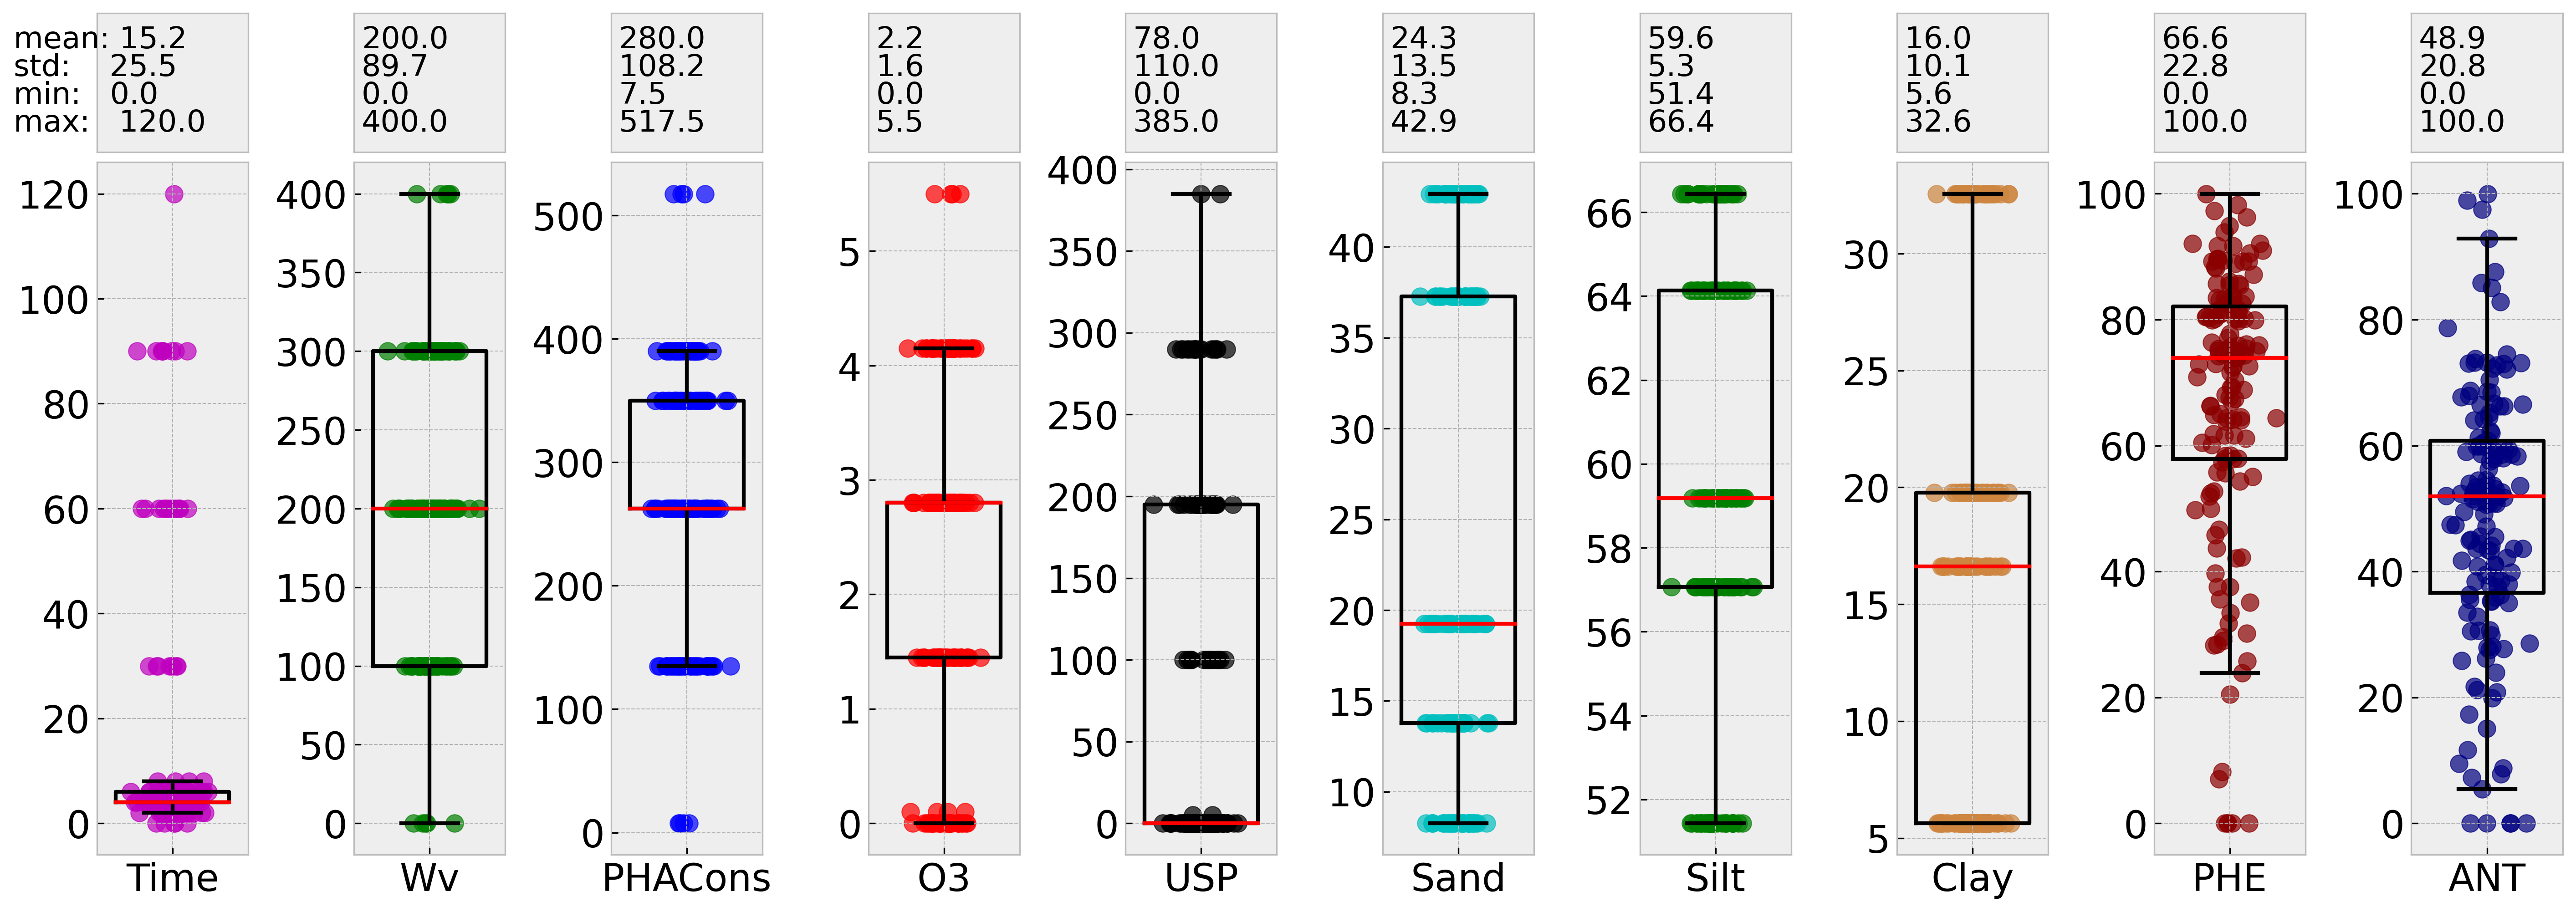

In [185]:
plt.style.use('bmh')   # default

font1 = {'family':'serif','color':'black'}
font2 = {'family':'serif','color':'darkred'}

# Set the default text font size
plt.rc('font', size=20)
# Set the fig title font size
plt.rc('axes', titlesize=20)
# Set the axes labels font size
plt.rc('axes', labelsize=20)
# Set the font size for x tick labels
plt.rc('xtick', labelsize=20)
# Set the font size for y tick labels
plt.rc('ytick', labelsize=20)
# Set the legend font size
plt.rc('legend', fontsize=20)
# Set the font size of the figure title
plt.rc('figure', titlesize=20)

fig = plt.figure(figsize=(50,8), dpi=300)
gs  = gridspec.GridSpec(2, 21, wspace=0.7, hspace=0.025, height_ratios=[0.2, 1])

cl=['m', 'g', 'b', 'r', 'k', 'c', 'green', 'peru', 'darkred', 'navy', 
       'k', 'indigo', 'teal', 'silver', 'skyblue', 'gold', 'brown', 'lime', 'darkblue', 'olive', 'purple']
j=0
for col in df_col:
    ax = fig.add_subplot(gs[1,j])
    ax=plt.boxplot(df[col], widths=.75, labels=[col], meanline =True,vert=True,
                showfliers = False,
                medianprops = {"color": "r", "linewidth": 2},
                boxprops = {"color": "k", "linewidth": 2},
                whiskerprops = {"color": "k", "linewidth": 2},
                capprops = {"color": "k", "linewidth": 2})
    
    xs, names = [], []
    vals=np.asanyarray(df[col])
    names.append(col)
    xs.append(np.random.normal(1, 0.1, len(df[col])))
    ax=plt.scatter(xs,df[col], alpha= 0.7, marker='o', s=85, color=cl[j])
    plt.yticks(rotation=0)
    plt.xticks(rotation=0)
    
    
    ax1 = fig.add_subplot(gs[0,j])
    if j==0:
        text_mean=  'mean: ' + str(ddf[col]['mean'].round(1))
        text_std=   'std:    ' + str(ddf[col]['std'].round(1))
        text_min=  'min:   ' + str(ddf[col]['min'].round(1))
        text_max=  'max:   ' + str(ddf[col]['max'].round(1))
        ax1=plt.text(-.55, 0.75, text_mean, fontsize = 16)
        ax1=plt.text(-.55, 0.55, text_std, fontsize = 16)
        ax1=plt.text(-.55, 0.35, text_min, fontsize = 16)
        ax1=plt.text(-.55, 0.15, text_max, fontsize = 16)
    else :
        text_mean= str(ddf[col]['mean'].round(1))
        text_std= str(ddf[col]['std'].round(1))
        text_min= str(ddf[col]['min'].round(1))
        text_max= str(ddf[col]['max'].round(1))            
        ax1=plt.text(0.05, 0.75, text_mean, fontsize = 16)
        ax1=plt.text(0.05, 0.55, text_std, fontsize = 16)
        ax1=plt.text(0.05, 0.35, text_min, fontsize = 16)
        ax1=plt.text(0.05, 0.15, text_max, fontsize = 16)

    plt.yticks([])
    plt.xticks([])
    j=j+1


In [189]:
X_train_RFR=pd.read_csv('X_train_RFR.csv')
X_train_GBR=pd.read_csv('X_train_GBR.csv')
X_train_XGBR=pd.read_csv('X_train_XGBR.csv')

X_test_RFR=pd.read_csv('X_test_RFR.csv')
X_test_GBR=pd.read_csv('X_test_GBR.csv')
X_test_XGBR=pd.read_csv('X_test_XGBR.csv')



y_train_RFR=pd.read_csv('y_train_RFR.csv')
y_train_GBR=pd.read_csv('y_train_GBR.csv')
y_train_XGBR=pd.read_csv('y_train_XGBR.csv')

y_test_RFR=pd.read_csv('y_test_RFR.csv')
y_test_GBR=pd.read_csv('y_test_GBR.csv')
y_test_XGBR=pd.read_csv('y_test_XGBR.csv')

y_pred_train_RFR=estimator_RFR.predict(X_train_RFR)
y_pred_test_RFR=estimator_RFR.predict(X_test_RFR)

y_pred_train_GBR=estimator_GBR.predict(X_train_GBR)
y_pred_test_GBR=estimator_GBR.predict(X_test_GBR)

y_pred_train_XGBR=estimator_XGBR.predict(X_train_XGBR)
y_pred_test_XGBR=estimator_XGBR.predict(X_test_XGBR)


# Ploting Features Importance

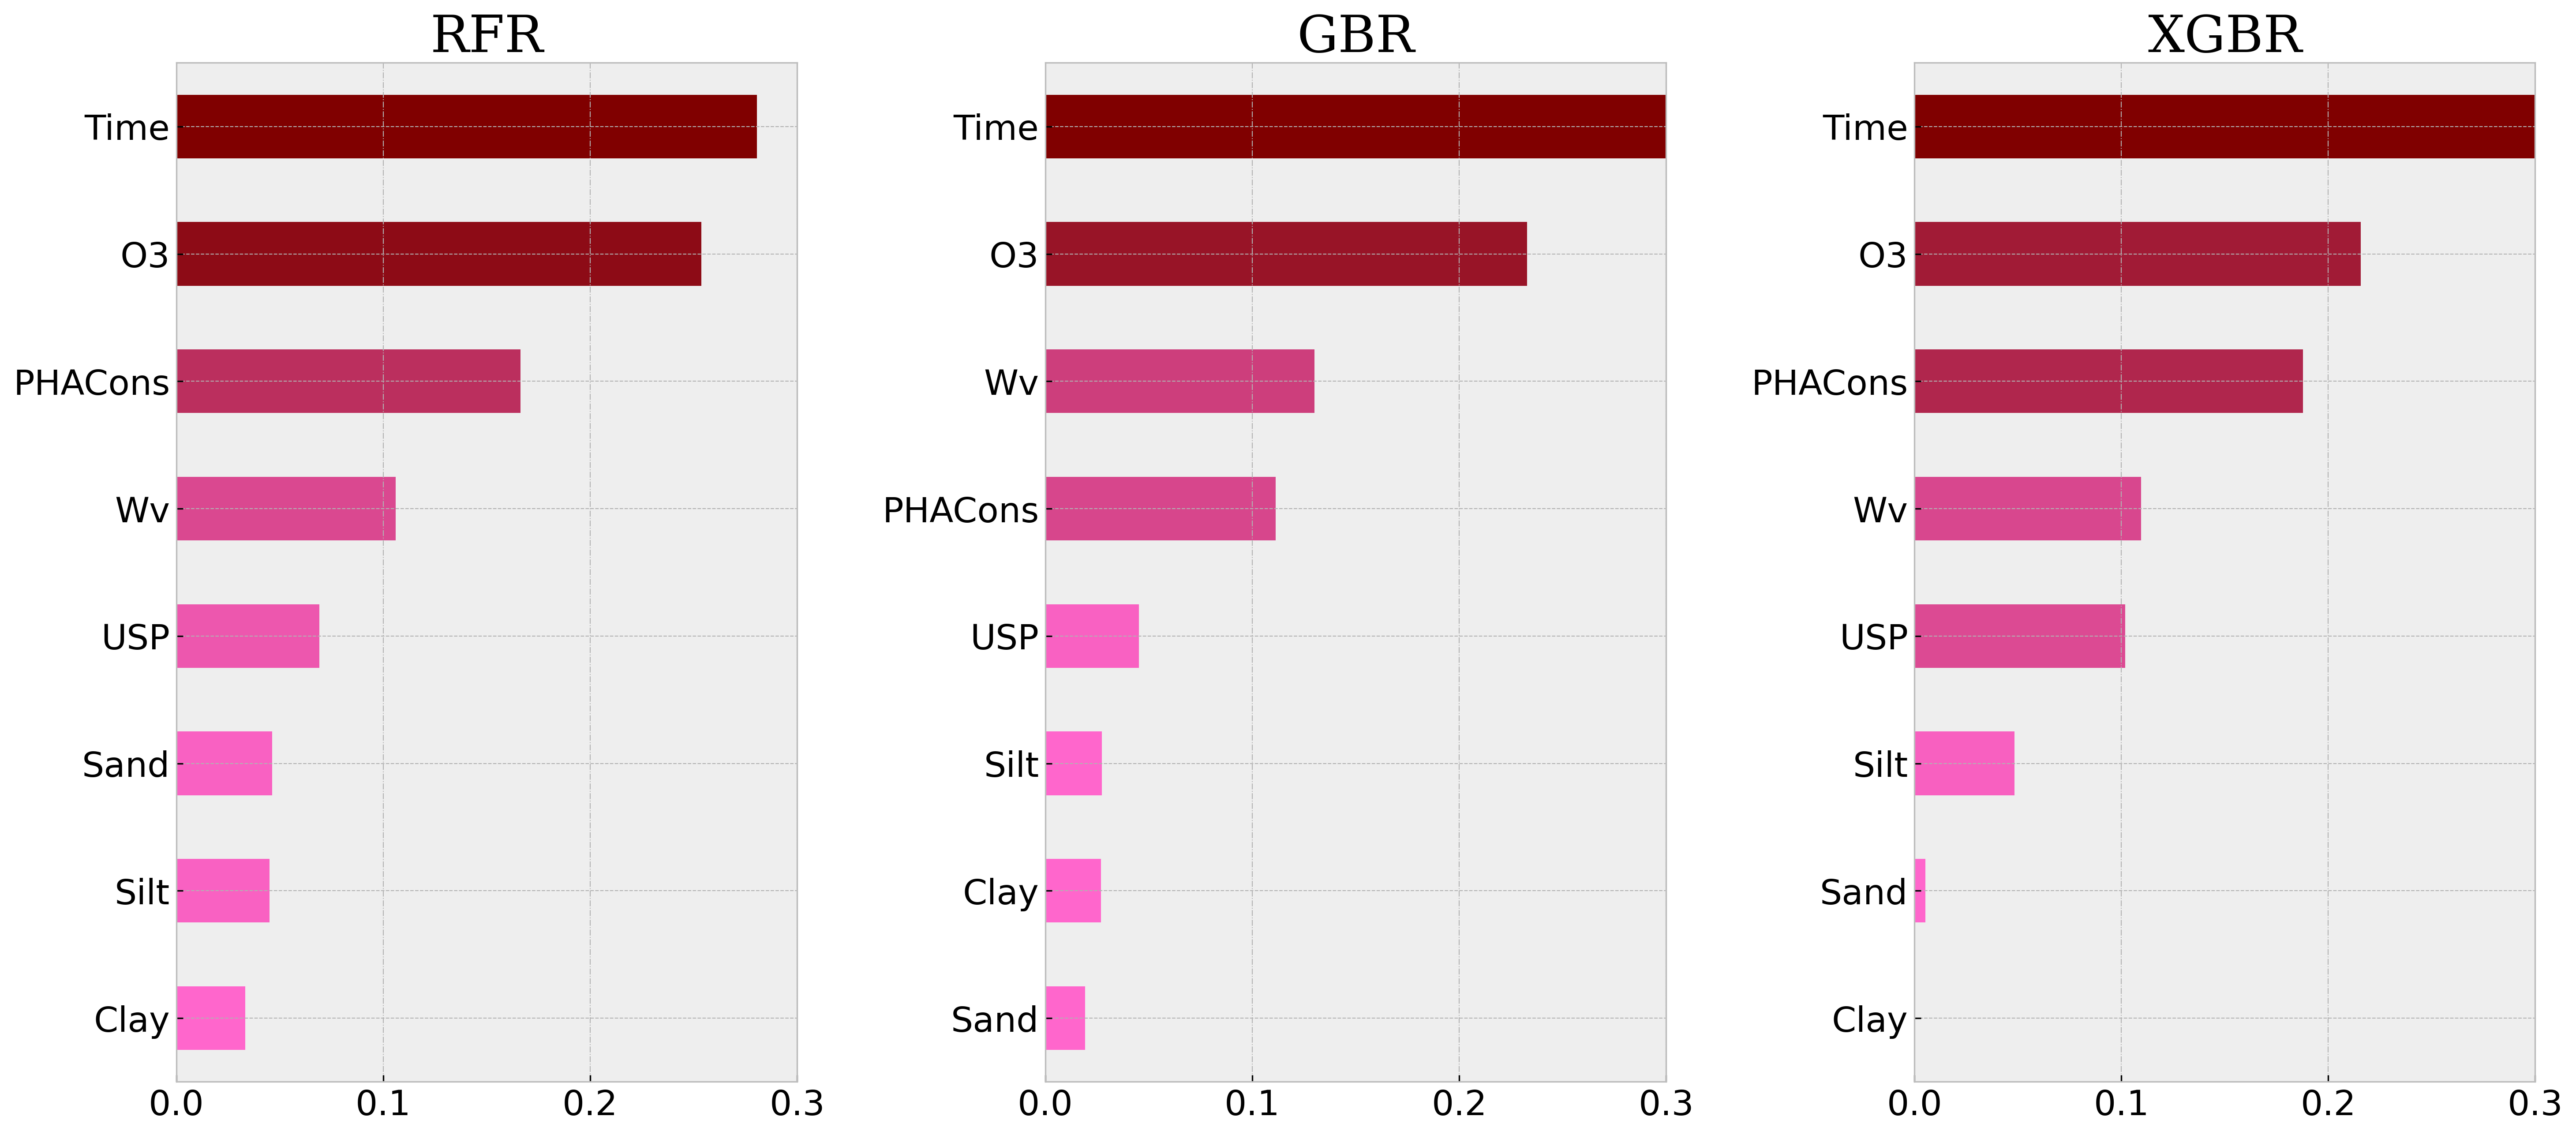

In [190]:
import matplotlib as mp
plt.style.use('bmh')   # default

font1 = {'family':'serif','color':'black'}
font2 = {'family':'serif','color':'darkred'}

# Set the default text font size
plt.rc('font', size=20)
# Set the fig title font size
plt.rc('axes', titlesize=22)
# Set the axes labels font size
plt.rc('axes', labelsize=20)
# Set the font size for x tick labels
plt.rc('xtick', labelsize=19)
# Set the font size for y tick labels
plt.rc('ytick', labelsize=19)
# Set the legend font size
plt.rc('legend', fontsize=18)
# Set the font size of the figure title
plt.rc('figure', titlesize=22)

Models=[estimator_RFR,estimator_GBR,estimator_XGBR]
modelsName=['RFR', 'GBR', 'XGBR']

fig = plt.figure(figsize=(23,10), dpi=300)
gs  = gridspec.GridSpec(1, 3, wspace=0.40, hspace=0.1,
                        width_ratios=[1, 1, 1], height_ratios=[1.5])


data_normalizer = mp.colors.Normalize()
color_map = mp.colors.LinearSegmentedColormap("my_map", {"red": [(0, 1.0, 1.0), (1.0, .5, .5)],
                                                         "green": [(0, 0.5, 0.4), (1.0, 0, 0)],
                                                         "blue": [(0, 0.50, 0.8), (1.0, 0, 0)]})


i=0
for model in Models:
    if i==0 or i==1:
        importances=model.feature_importances_
        feature_names = model.feature_names_in_ 
        estimator_importances = pd.Series(importances, index=feature_names).sort_values(ascending=True)
    
        ax = fig.add_subplot(gs[0,i])
        color_scores = np.array(estimator_importances)
        ax = estimator_importances.plot.barh(color=color_map(data_normalizer(color_scores)))   

    
        ax.set_title(modelsName[i]  , loc= 'center', fontdict = font1, fontsize=28)
        ax.set_xlim(([0, 0.3]))
        plt.yticks( rotation=0)
        plt.xticks( rotation=0)   
        ax.grid(visible=True, which='major', axis='x', linestyle ='-.')
        i=i+1
        
    else:
        importances=model.feature_importances_
        feature_names = Features
        estimator_importances = pd.Series(importances, index=feature_names).sort_values(ascending=True)
    
        ax = fig.add_subplot(gs[0,i])
        color_scores = np.array(estimator_importances)
        ax = estimator_importances.plot.barh(color=color_map(data_normalizer(color_scores)))   

    
        ax.set_title(modelsName[i]  , loc= 'center', fontdict = font1, fontsize=28)
        ax.set_xlim(([0, 0.3]))
        plt.yticks( rotation=0)
        plt.xticks( rotation=0)   
        ax.grid(visible=True, which='major', axis='x', linestyle ='-.')
        
        
    
    plt.yticks(rotation=0)
    

# MODEL ACCURACY

In [191]:
X_train_RFR=pd.read_csv('X_train_RFR.csv')
X_train_GBR=pd.read_csv('X_train_GBR.csv')
X_train_XGBR=pd.read_csv('X_train_XGBR.csv')

X_test_RFR=pd.read_csv('X_test_RFR.csv')
X_test_GBR=pd.read_csv('X_test_GBR.csv')
X_test_XGBR=pd.read_csv('X_test_XGBR.csv')


In [192]:
DATA_train = pd.DataFrame()

DATA_train['y_RFR']= y_train_RFR
DATA_train['y_pred_RFR']= y_pred_train_RFR
DATA_train['MAE_RFR'] = (DATA_train['y_RFR']- DATA_train['y_pred_RFR']).abs()

DATA_train['y_GBR']= y_train_GBR
DATA_train['y_pred_GBR']= y_pred_train_GBR
DATA_train['MAE_GBR'] = (DATA_train['y_GBR']- DATA_train['y_pred_GBR']).abs()

DATA_train['y_XGBR']= y_train_XGBR
DATA_train['y_pred_XGBR']= y_pred_train_XGBR
DATA_train['MAE_XGBR'] = (DATA_train['y_XGBR']- DATA_train['y_pred_XGBR']).abs()

DATA_test = pd.DataFrame()

DATA_test['y_RFR']= y_test_RFR
DATA_test['y_pred_RFR']= y_pred_test_RFR
DATA_test['MAE_RFR'] = (DATA_test['y_RFR']- DATA_test['y_pred_RFR']).abs()

DATA_test['y_GBR']= y_test_GBR
DATA_test['y_pred_GBR']= y_pred_test_GBR
DATA_test['MAE_GBR'] = (DATA_test['y_GBR']- DATA_test['y_pred_GBR']).abs()

DATA_test['y_XGBR']= y_test_XGBR
DATA_test['y_pred_XGBR']= y_pred_test_XGBR
DATA_test['MAE_XGBR'] = (DATA_test['y_XGBR']- DATA_test['y_pred_XGBR']).abs()

In [193]:
DATA_test

y_RFR  y_pred_RFR    MAE_RFR  y_GBR  y_pred_GBR    MAE_GBR  y_XGBR  \
0   61.65   65.522188   3.872188  69.19   62.030994   7.159006   70.35   
1   82.30   76.007458   6.292542  75.92   70.820844   5.099156   81.27   
2   35.12   47.781341  12.661341  29.03   56.654945  27.624945   30.20   
3   85.39   72.155267  13.234733  57.91   58.667376   0.757376   52.74   
4   76.10   69.297559   6.802441  83.49   81.049751   2.440249   35.63   
5   90.54   72.515650  18.024350  35.12   28.724231   6.395769   73.99   
6   89.60   80.771261   8.828739  72.60   73.300495   0.700495   79.90   
7   71.61   63.162576   8.447424  80.16   82.016433   1.856433   89.29   
8   64.15   68.250943   4.100943  25.78   32.377995   6.597995   63.80   
9   89.70   62.780732  26.919268  77.75   70.843040   6.906960   93.85   
10  83.40   76.007458   7.392542  93.85   92.740456   1.109544   73.91   
11  75.03   70.223519   4.806481  57.40   59.780697   2.380697   75.13   
12  75.06   70.223519   4.836481  75.30   77.478893   2.178893   46.68   
13  20.48   62.952382  42.472382  64.15   60.322919   3.827081   88.36   
14  74.20   74.316825   0.116825  63.80   64.272737   0.472737   97.30   
15   8.18   58.414132  50.234132  71.61   73.713028   2.103028   31.80   
16  89.65   78.947383  10.702617  64.52   64.861101   0.341101   90.96   
17   0.00   52.663536  52.663536  75.87   71.311088   4.558912   86.11   
18  80.28   70.713496   9.566504  74.20   76.894758   2.694758   83.00   
19  43.72   53.771348  10.051348  76.10   74.635328   1.464672   60.50   
20  73.91   66.807367   7.102633  73.83   75.971029   2.141029   55.65   
21  91.70   74.713092  16.986908  80.83   79.479938   1.350062   29.03   
22  67.62   66.223645   1.396355  80.21   75.046093   5.163907   20.48   

    y_pred_XGBR   MAE_XGBR  
0     70.440117   0.090117  
1     76.632690   4.637310  
2     30.420376   0.220376  
3     52.660538   0.079462  
4     39.649452   4.019452  
5     74.869576   0.879576  
6     78.094093   1.805907  
7     86.801865   2.488135  
8     62.460716   1.339284  
9     93.242393   0.607607  
10    73.326187   0.583813  
11    75.090240   0.039760  
12    46.403416   0.276584  
13    89.446075   1.086075  
14    94.106255   3.193745  
15    32.057137   0.257137  
16    79.523827  11.436173  
17    76.459229   9.650771  
18    83.030182   0.030182  
19    59.633392   0.866608  
20    56.833309   1.183309  
21    58.923584  29.893584  
22    30.701744  10.221744

In [194]:
ERR_train=DATA_train[['MAE_RFR', 'MAE_GBR', 'MAE_XGBR']]
ERR_test=DATA_test[['MAE_RFR', 'MAE_GBR', 'MAE_XGBR']]

In [195]:
ERR_train

MAE_RFR   MAE_GBR  MAE_XGBR
0     4.345678  0.256365  0.214512
1    43.977376  3.303325  0.036785
2     9.216504  3.509885  0.071711
3     3.522766  2.311686  0.230676
4     0.158689  2.272285  0.381066
..         ...       ...       ...
122   5.422491  1.981029  0.714680
123   4.568143  0.309158  0.014536
124   1.511411  2.319351  0.575274
125  14.856466  0.039518  0.590671
126   7.937588  1.562066  0.028493

[127 rows x 3 columns]

Text(0.5, 1.0, 'Train')

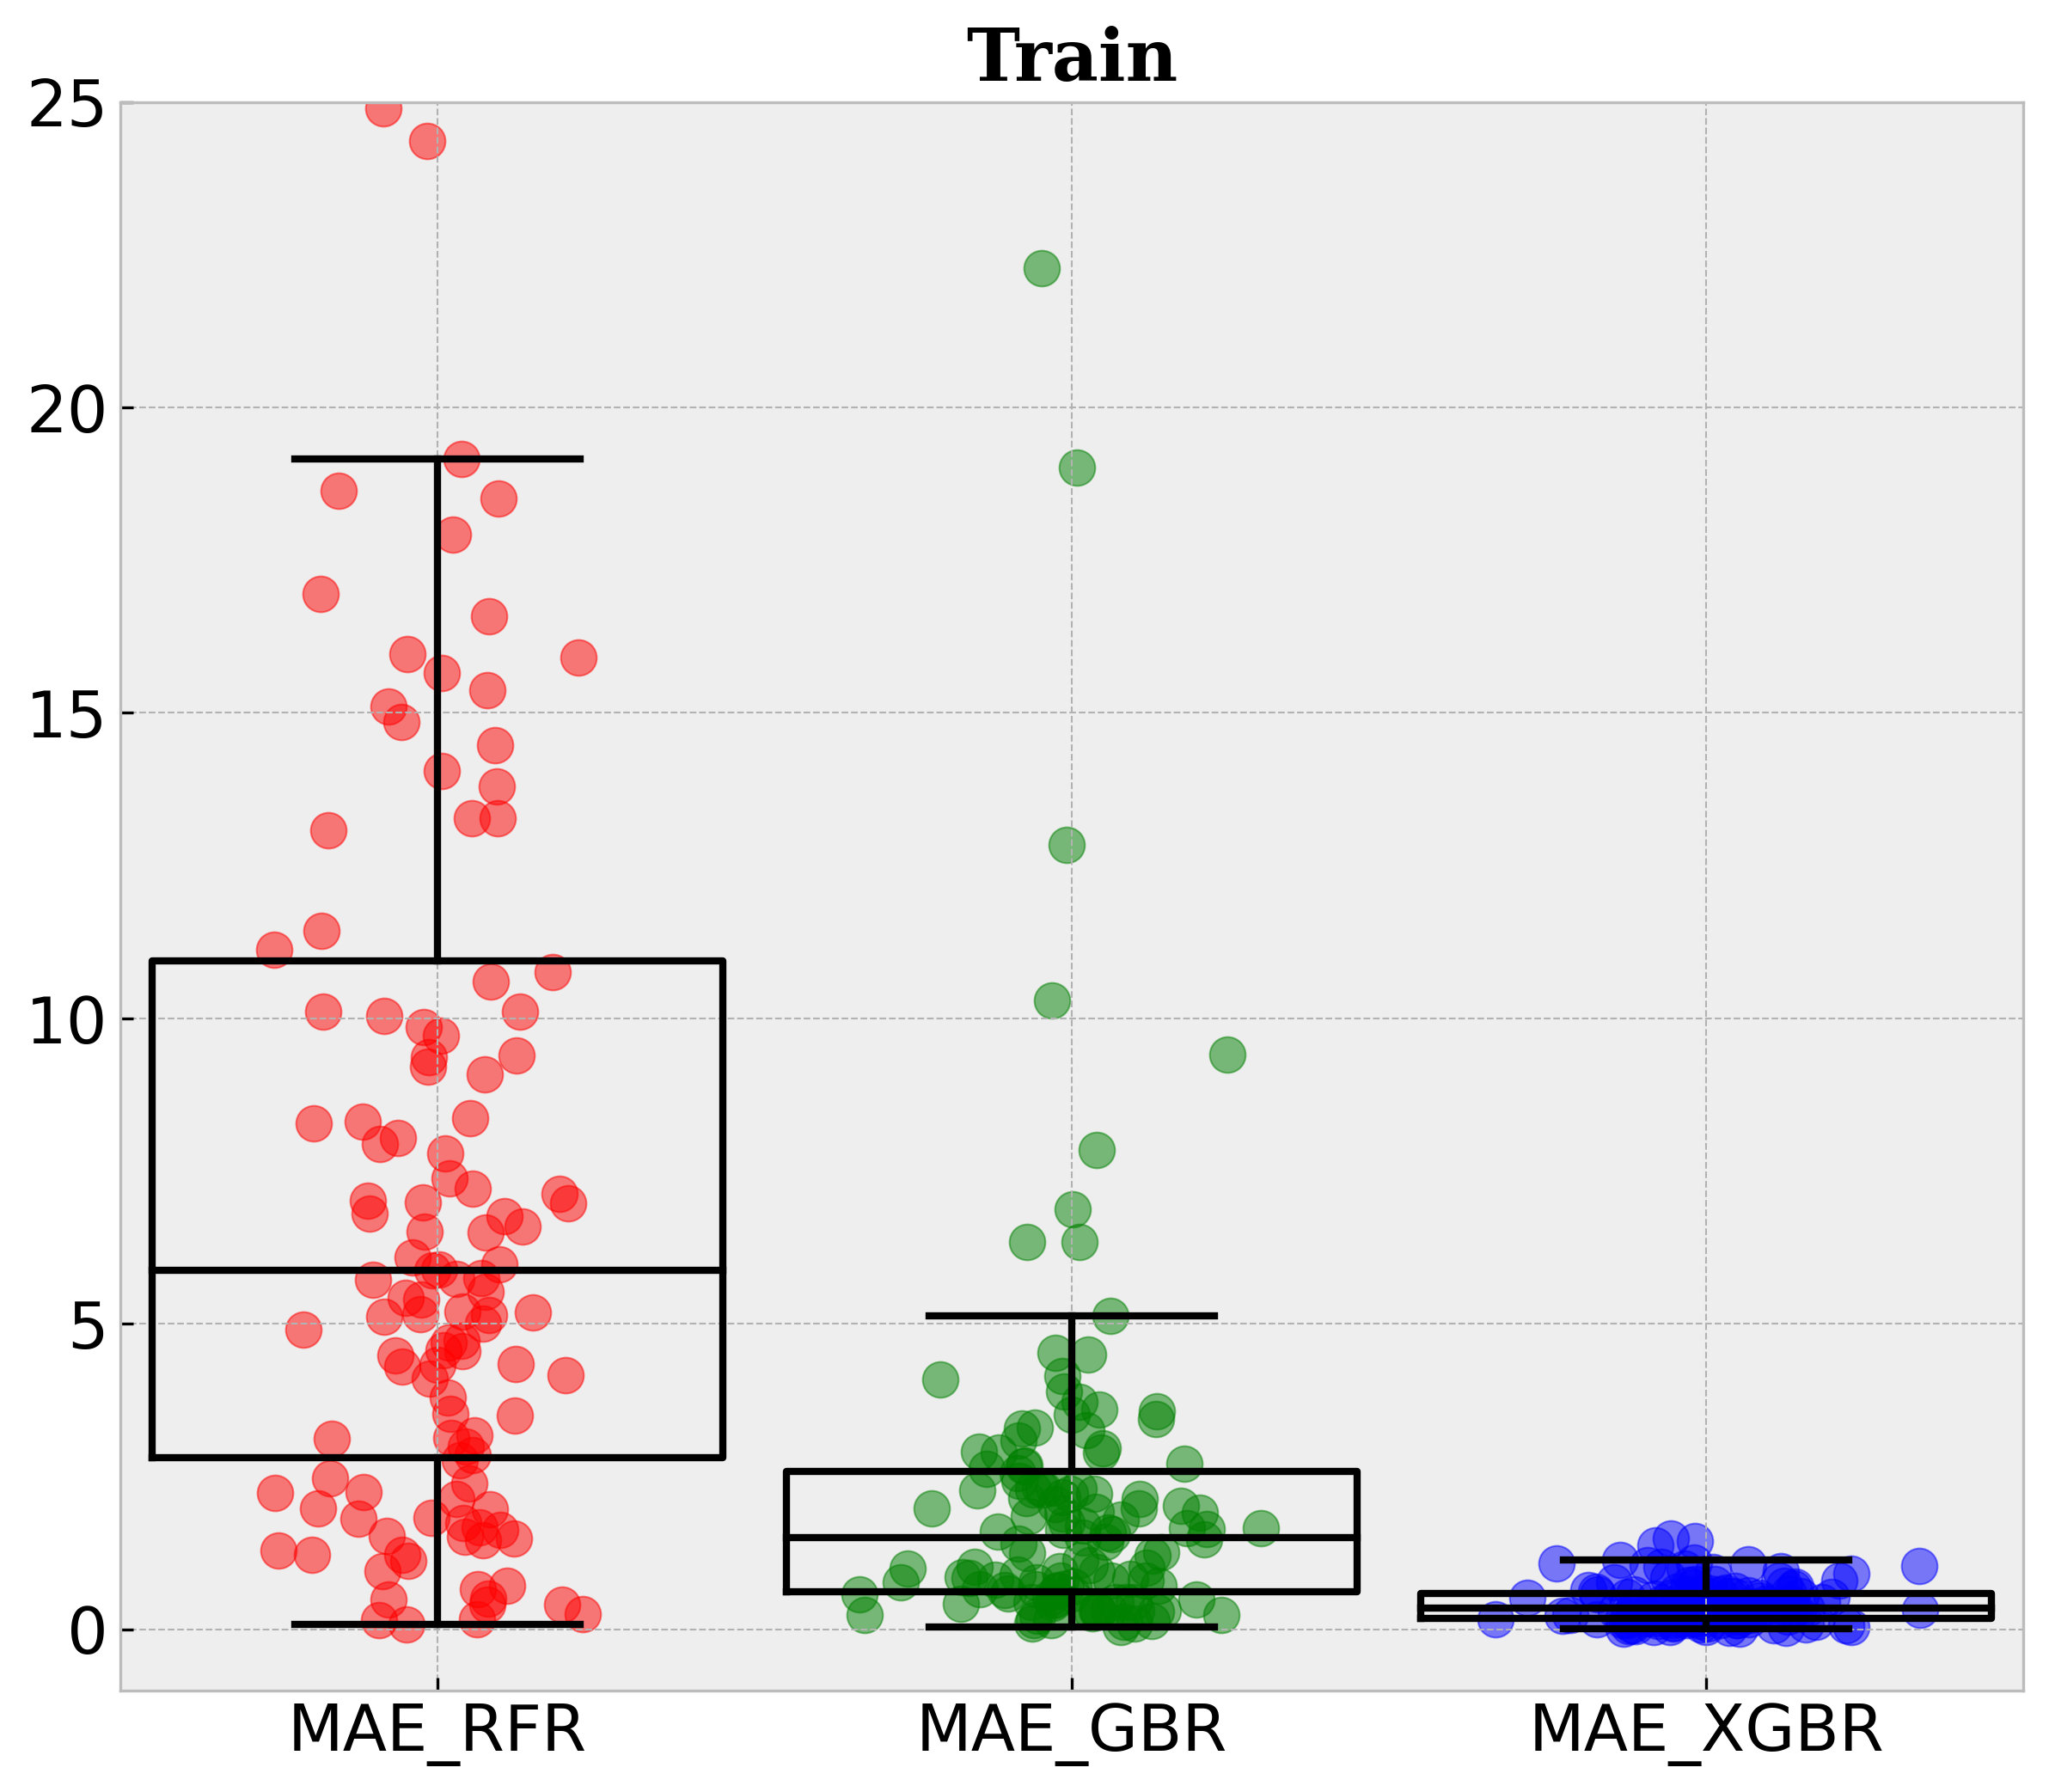

In [196]:
font1 = {'family':'serif','color':'black', 'size': '20'}
font2 = {'family':'serif','color':'black', 'size': '16'}

# Set the default text font size
plt.rc('font', size=18)
# Set the fig title font size
plt.rc('axes', titlesize=18)
# Set the axes labels font size
plt.rc('axes', labelsize=18)
# Set the font size for x tick labels
plt.rc('xtick', labelsize=18)
# Set the font size for y tick labels
plt.rc('ytick', labelsize=18)
# Set the legend font size
plt.rc('legend', fontsize=18)
# Set the font size of the figure title
plt.rc('figure', titlesize=18)


modelsNameTrain=['RFR', 'GBR - Train', 'XGBR - Train']
modelsNameTest=['RFR - Test', 'GBR - Test', 'XGBR - Test']


j=0
fig = plt.figure(figsize=(20,8), dpi=300)
gs  = gridspec.GridSpec(1, 2, wspace=0.1, hspace=0.15, width_ratios=[1,1], height_ratios=[1])

vals, names, xs = [],[],[]
for i, col in enumerate(ERR_train.columns):
    vals.append(ERR_train[col].values)
    names.append(col)
    xs.append(np.random.normal(i +1,  0.12, ERR_train[col].values.shape[0]))
    
ax = fig.add_subplot(gs[0,0])
ax=plt.boxplot(vals, labels=names, widths=.9, meanline =True,
                showfliers = False,
                medianprops = {"color": "k", "linewidth": 2},
                boxprops = {"color": "k", "linewidth": 2},
                whiskerprops = {"color": "k", "linewidth": 2},
                capprops = {"color": "k", "linewidth": 2})

palette = ['r', 'g', 'b']
for x, val, c in zip(xs, vals, palette):
    plt.scatter(x, val, alpha=0.5, color=c, s=100)
plt.axis([.5, 3.5, -1, 25])
plt.title('Train',fontweight='bold', fontdict=font1)



Text(0.5, 1.0, 'Test')

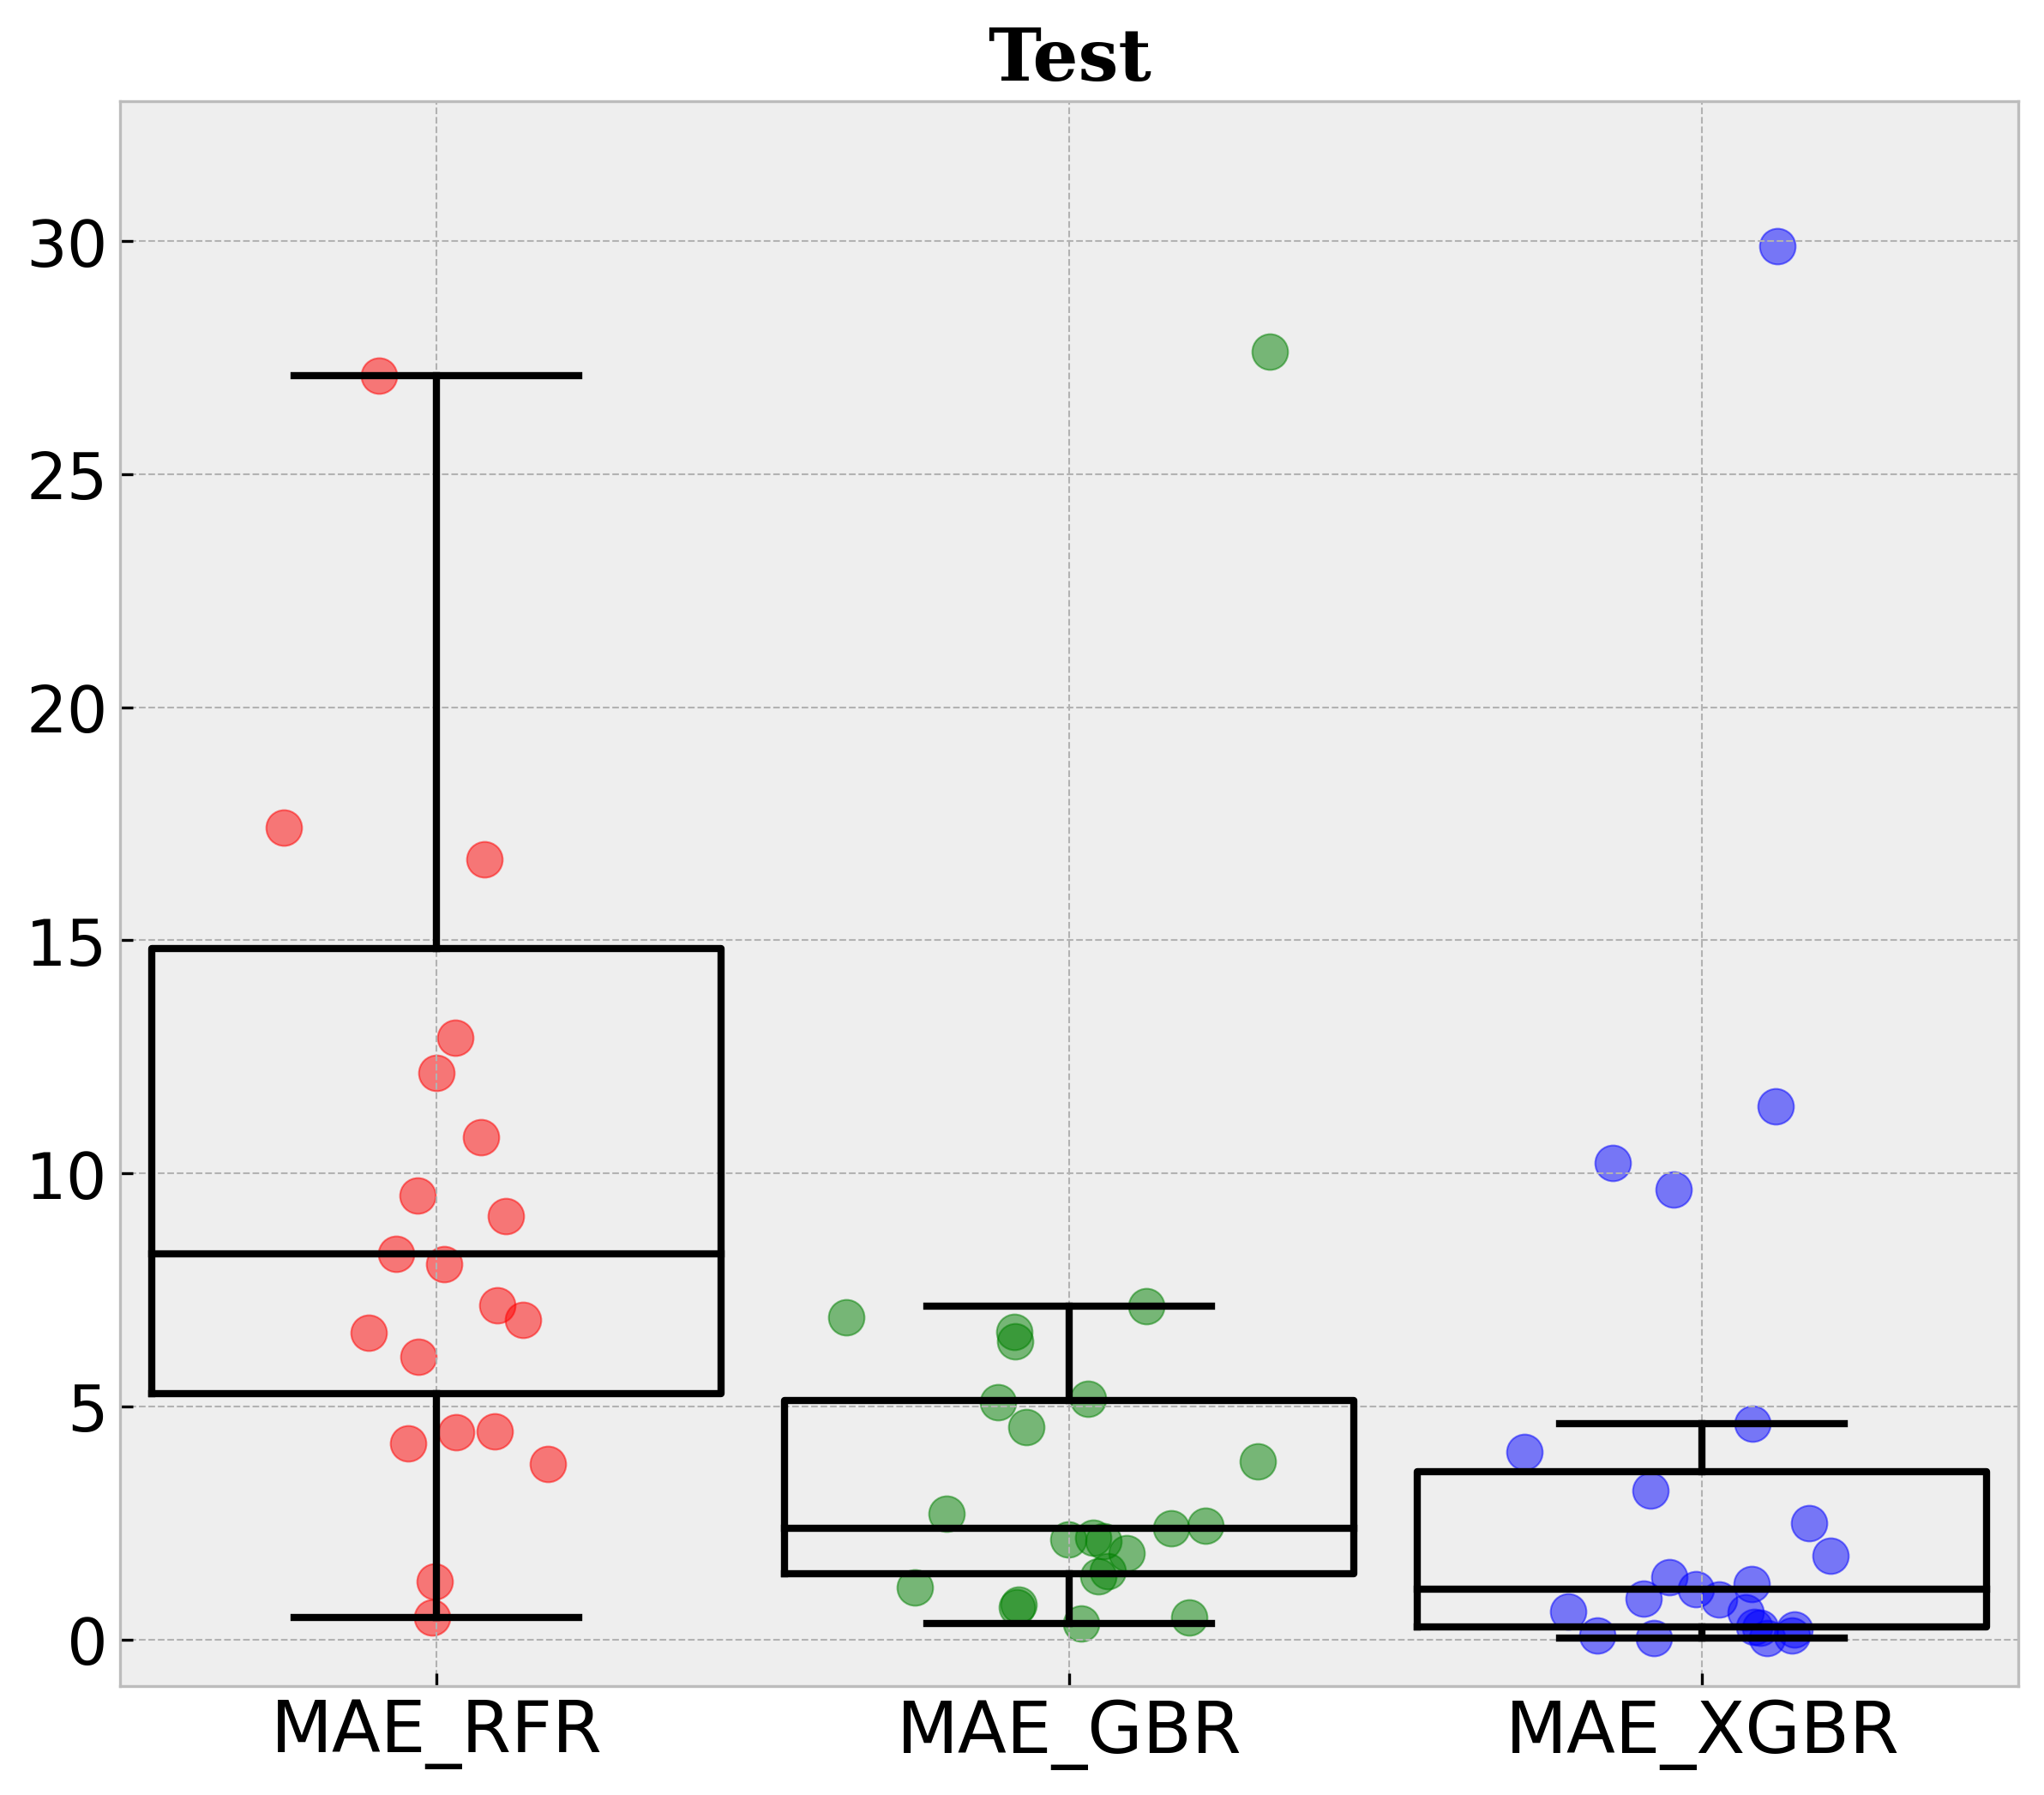

In [160]:
j=0
fig = plt.figure(figsize=(20,8), dpi=300)
gs  = gridspec.GridSpec(1, 2, wspace=0.1, hspace=0.15, width_ratios=[1,1], height_ratios=[1])

vals, names, xs = [],[],[]
for i, col in enumerate(ERR_test.columns):
    vals.append(ERR_test[col].values)
    names.append(col)
    xs.append(np.random.normal(i +1,  0.12, ERR_test[col].values.shape[0]))
    
ax = fig.add_subplot(gs[0,0])
ax=plt.boxplot(vals, labels=names, widths=.9, meanline =True,
                showfliers = False,
                medianprops = {"color": "k", "linewidth": 2},
                boxprops = {"color": "k", "linewidth": 2},
                whiskerprops = {"color": "k", "linewidth": 2},
                capprops = {"color": "k", "linewidth": 2})

palette = ['r', 'g', 'b']
for x, val, c in zip(xs, vals, palette):
    plt.scatter(x, val, alpha=0.5, color=c, s=100)
plt.axis([.5, 3.5, -1, 33])
plt.title('Test',fontweight='bold', fontdict=font1)



In [158]:
DRF_train=[DATA_train[['y_RFR', 'y_pred_RFR']], DATA_train[['y_GBR', 'y_pred_GBR']], DATA_train[['y_XGBR', 'y_pred_XGBR']]]
DRF_test=[DATA_test[['y_RFR', 'y_pred_RFR']], DATA_test[['y_GBR', 'y_pred_GBR']], DATA_test[['y_XGBR', 'y_pred_XGBR']]]

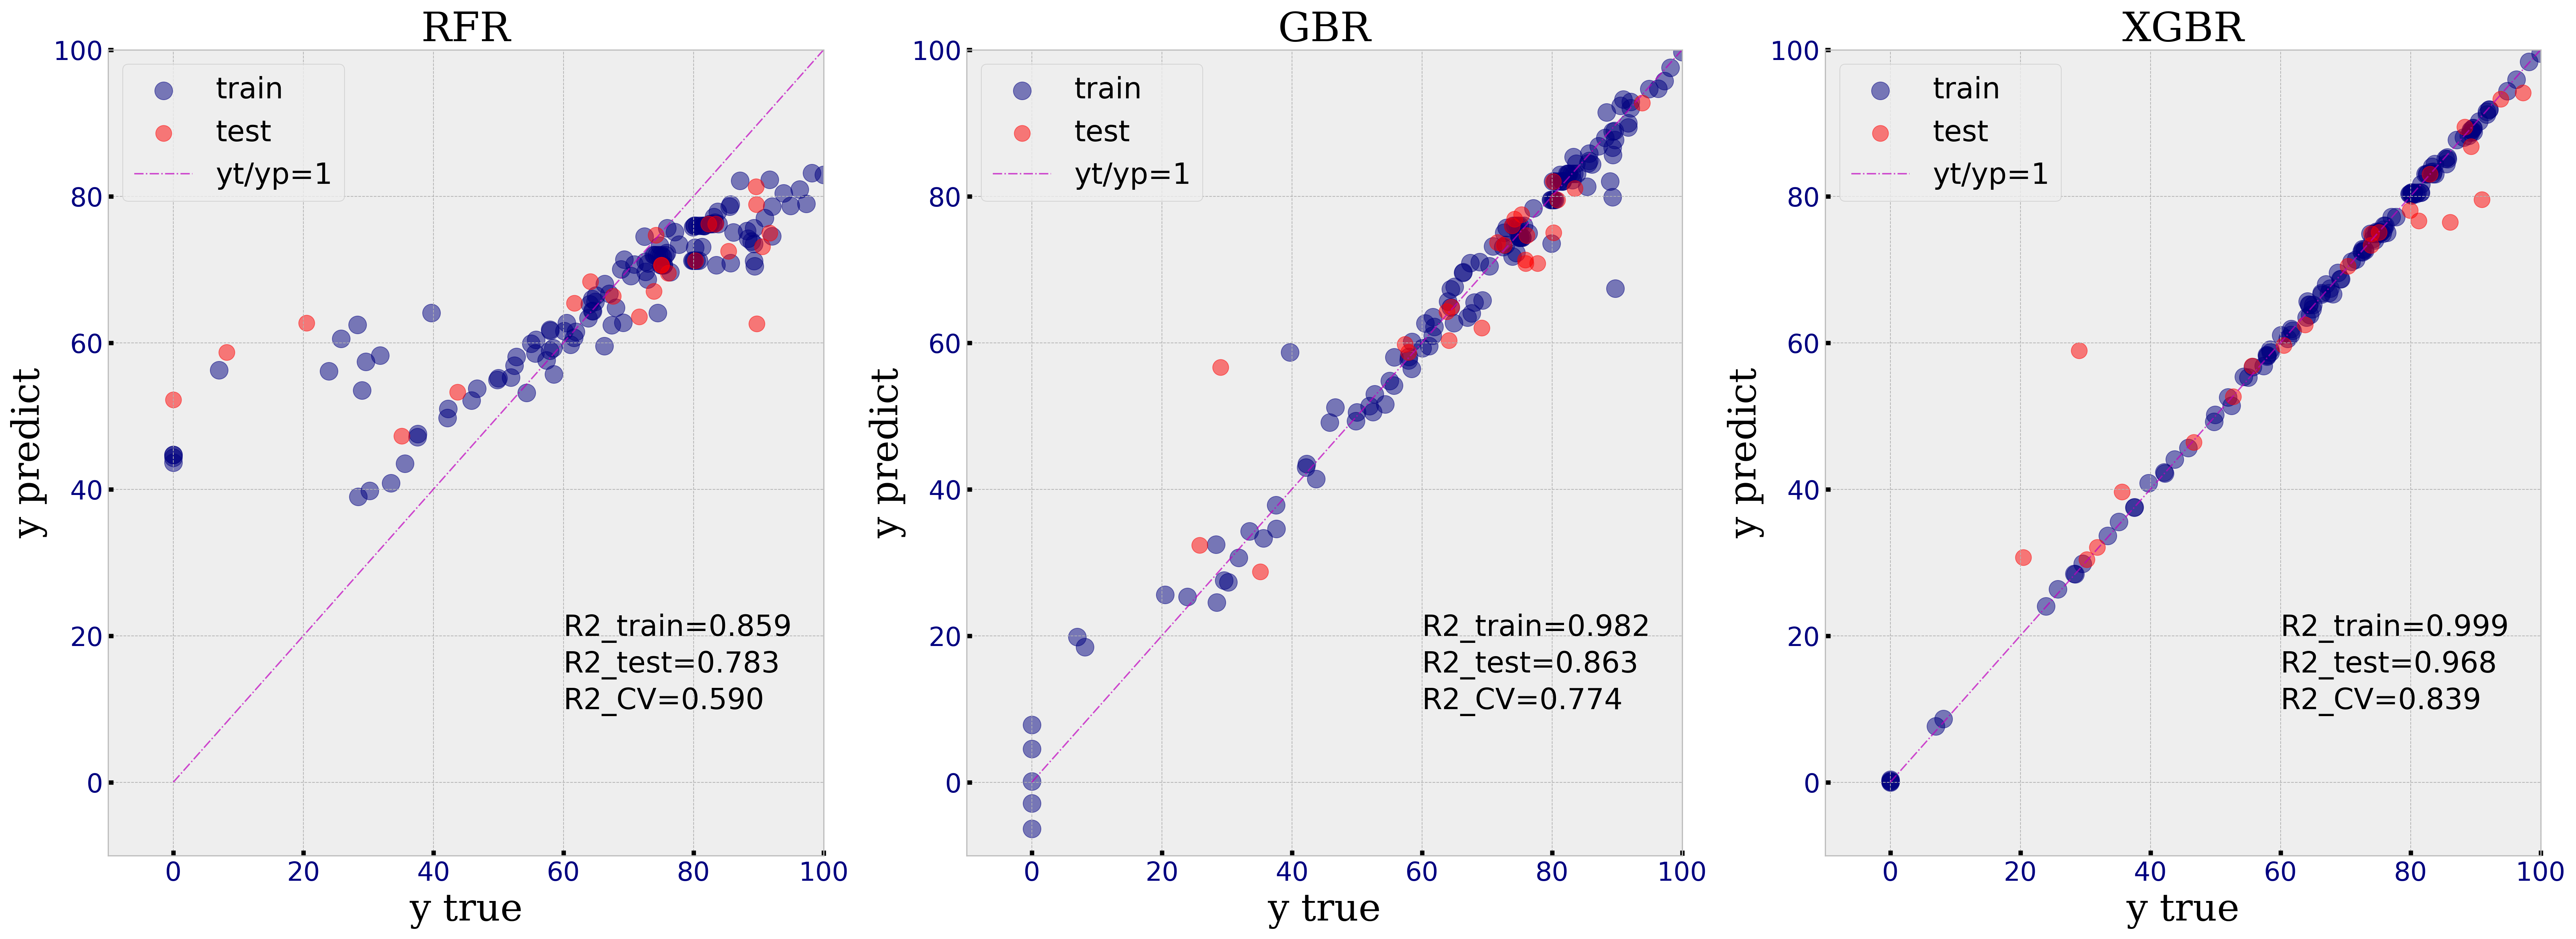

In [159]:
# Set the default text font size
plt.rc('font', size=18)
# Set the fig title font size
plt.rc('axes', titlesize=18)
# Set the axes labels font size
plt.rc('axes', labelsize=18)
# Set the font size for x tick labels
plt.rc('xtick', labelsize=20)
# Set the font size for y tick labels
plt.rc('ytick', labelsize=18)
# Set the legend font size
plt.rc('legend', fontsize=20)
# Set the font size of the figure title
plt.rc('figure', titlesize=18)



fig = plt.figure(figsize=(30,10), dpi=300)
gs  = gridspec.GridSpec(1, 3, wspace=0.2, hspace=0.15, width_ratios=[1, 1, 1], height_ratios=[1])
modelsName=['RFR', 'GBR', 'XGBR']


j=0
for DATA in DRF_train:
    DATA.columns=['y_true', 'y_first']
    DRF_test[j].columns = ['y_true', 'y_first']
    ax = fig.add_subplot(gs[0,j])
    ax.scatter(DATA['y_true'], DATA['y_first'], s=150, color='navy',label='train', alpha=0.5)
    ax.scatter(DRF_test[j]['y_true'], DRF_test[j]['y_first'], s=120, color='r',label='test', alpha=0.5)
    ax.plot([0, 350], [0, 350], 'k-.', lw=1, label='yt/yp=1', alpha=.7, color='m')
    
    plt.xlabel("y true", fontdict=font1, fontsize=26)
    plt.ylabel("y predict", fontdict=font1, fontsize=26)
    ax.set_xlim([-10, 100])
    ax.set_ylim([-10, 100])
    ax.set_title(modelsName[j]  , loc= 'center', fontdict = font1, fontsize=28)
    plt.yticks(rotation=0)
    plt.xticks(rotation=0)
    ax.tick_params(labelcolor='navy', labelsize='medium', width=3)
    ax.legend()
    
    R2TR=['R2_train=0.859','R2_train=0.982','R2_train=0.999']
    R2TE=['R2_test=0.783','R2_test=0.863','R2_test=0.968']
    CV5R2=['R2_CV=0.590','R2_CV=0.774','R2_CV=0.839']
    ax=plt.text(60, 20, R2TR[j], fontsize = 20)
    ax=plt.text(60, 15,  R2TE[j], fontsize = 20)
    ax=plt.text(60, 10,  CV5R2[j], fontsize = 20)
    j=j+1
